# Approximation of measurable functions 

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"

In [14]:
def ind(r, k, n):
    l_bound = (k - 1) / 2 ** n
    u_bound = k / 2 ** n
    
    return (r >= l_bound) * (r < u_bound)

ind = jax.vmap(ind, (None, 0, None))


def d(n, r):
    k_vals = jnp.arange(1, n * 2 ** n + 1)
    S_term = (k_vals - 1) / 2 ** n * ind(r, k_vals, n)
    return S_term.sum() + n * (r >= n)
    
# vmap over domain
d_r = jax.vmap(d, (None, 0))
# vmap over partitions
d_n = jax.vmap(d, (0, None))

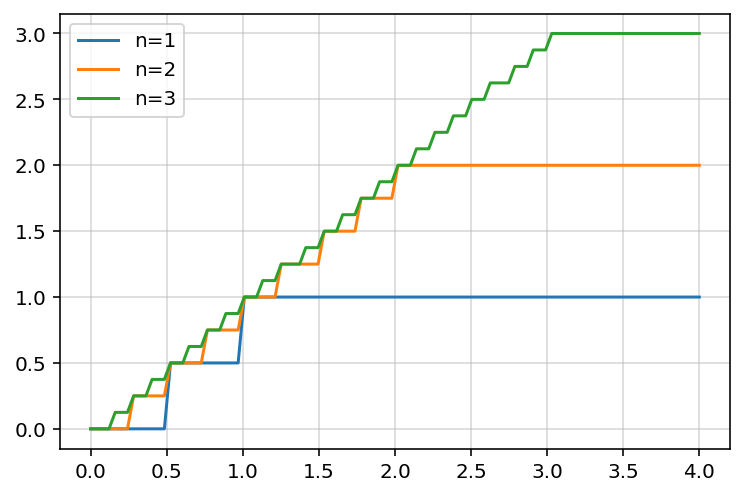

In [23]:
xrange = jnp.linspace(0, 4, 100)

plt.plot(xrange, d_r(1, xrange), label="n=1")
plt.plot(xrange, d_r(2, xrange), label="n=2")
plt.plot(xrange, d_r(3, xrange), label="n=3")
# plt.plot(xrange, d_r(7, xrange), label="n=7")

plt.grid(alpha=0.5)
plt.legend()

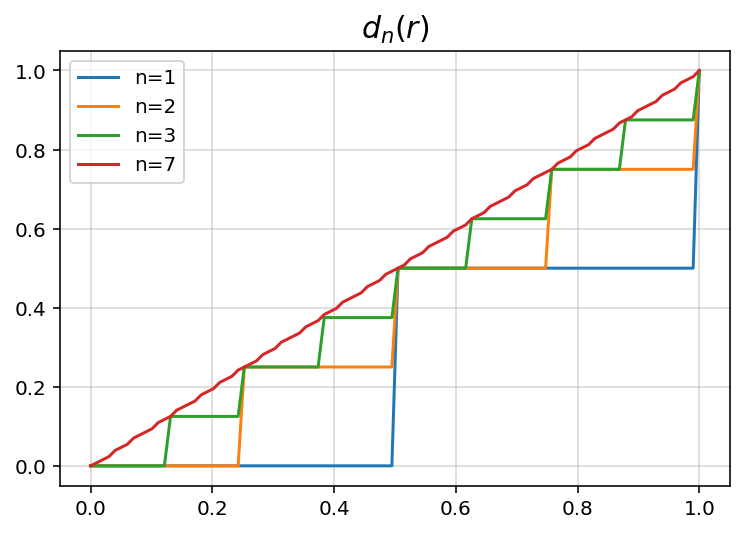

In [28]:
xrange = jnp.linspace(0, 1, 100)

plt.plot(xrange, d_r(1, xrange), label="n=1")
plt.plot(xrange, d_r(2, xrange), label="n=2")
plt.plot(xrange, d_r(3, xrange), label="n=3")
plt.plot(xrange, d_r(7, xrange), label="n=7")

plt.title("$d_n(r)$", fontsize=15)
plt.grid(alpha=0.5)
plt.legend()